In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import copy

In [2]:
cols = ["area", "parameter", "compactness", "length", "width", "asymmetryCoef", "groove", "class"]
df = pd.read_csv("/content/seeds_dataset.txt", names=cols, sep="\s+")
df.head()

,area,parameter,compactness,length,width,asymmetryCoef,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


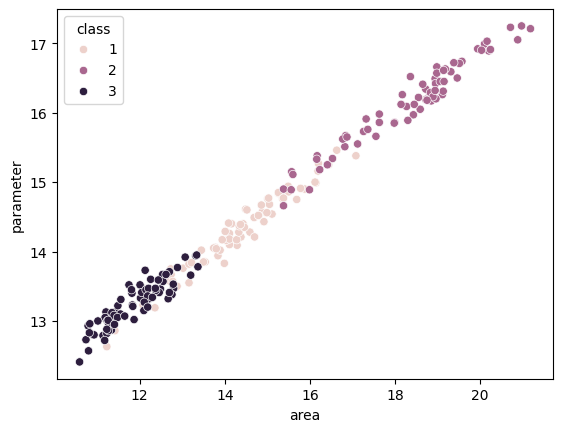

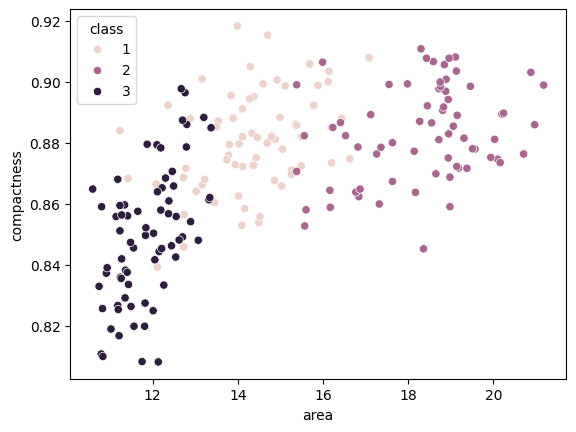

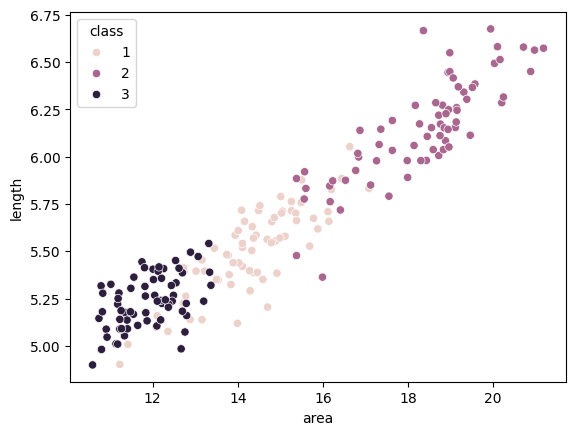

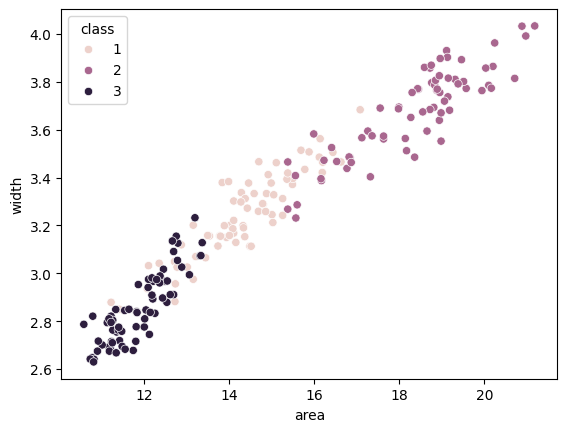

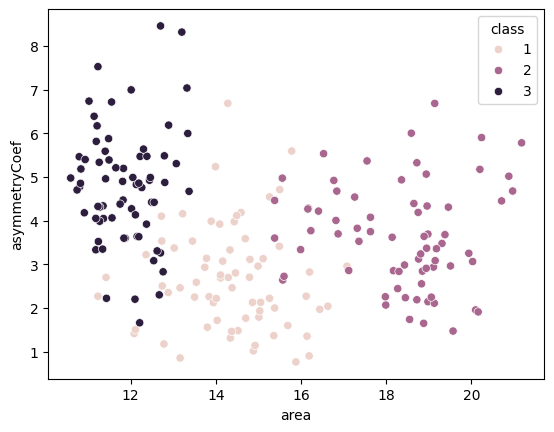

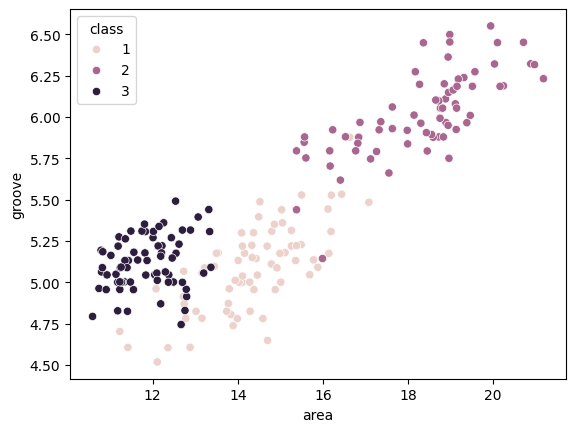

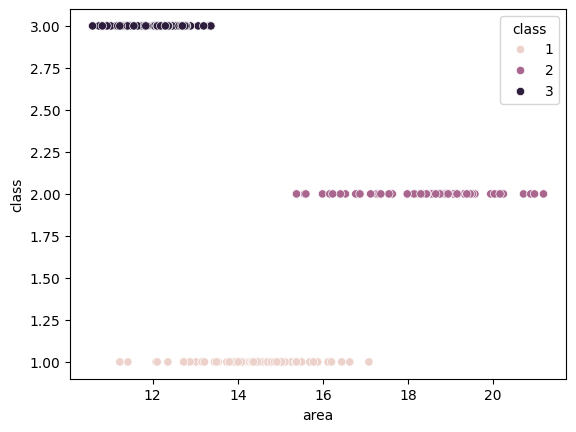

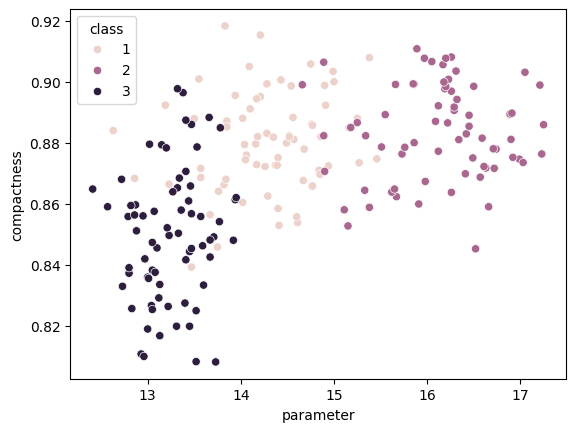

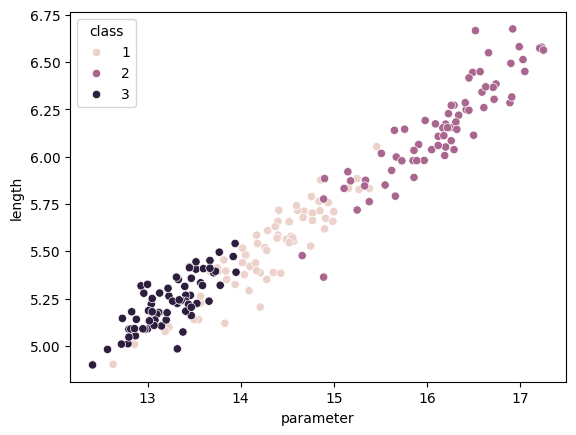

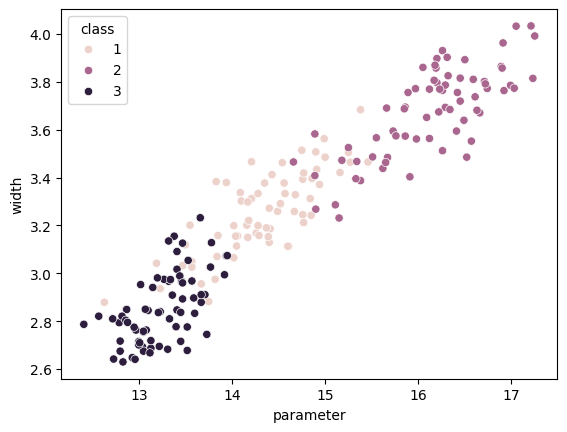

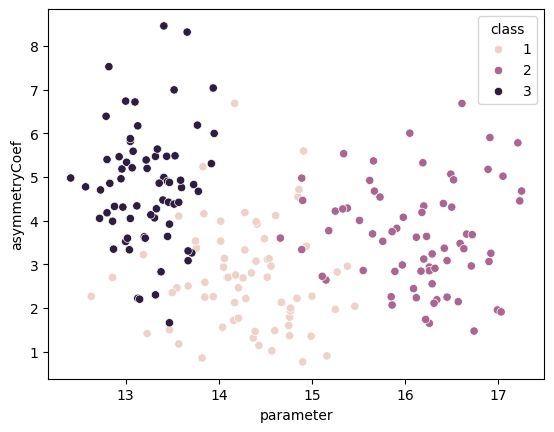

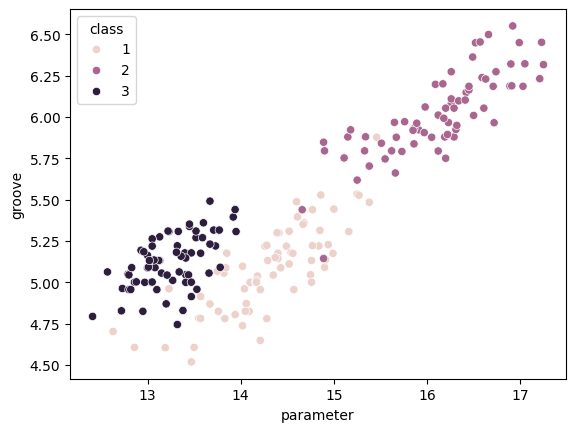

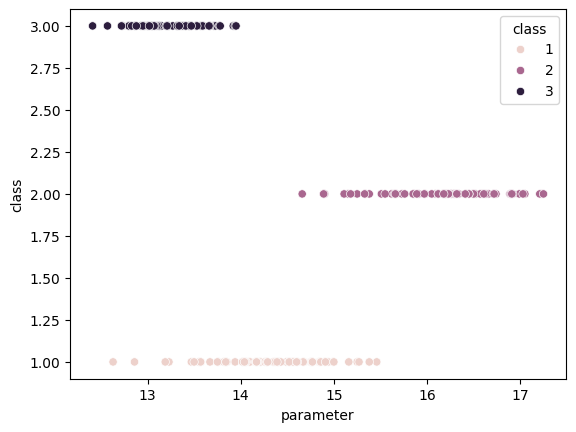

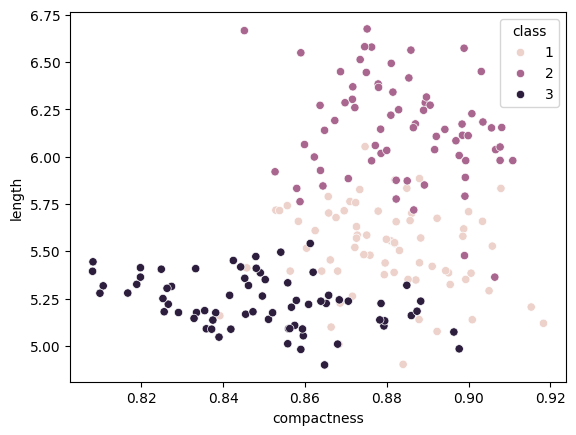

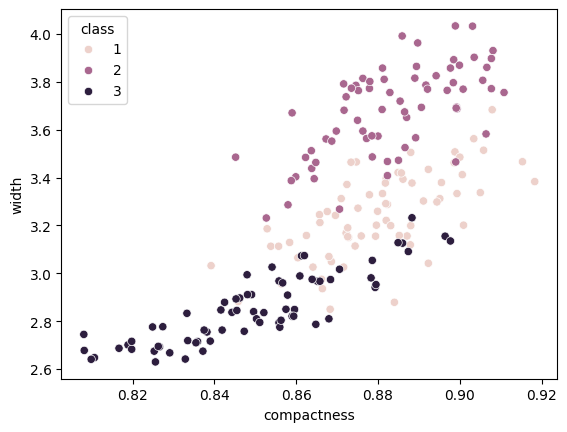

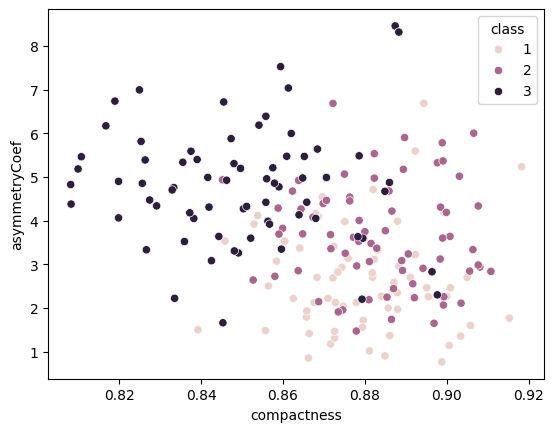

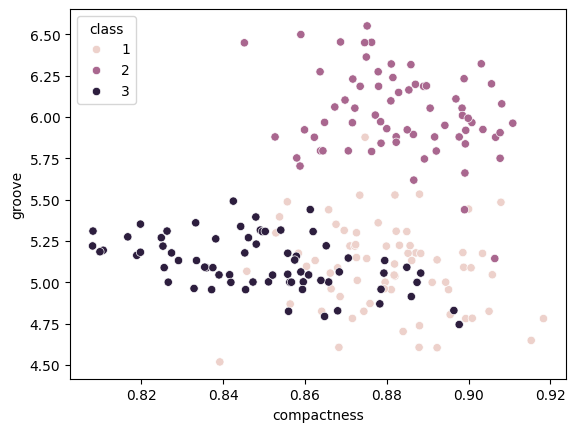

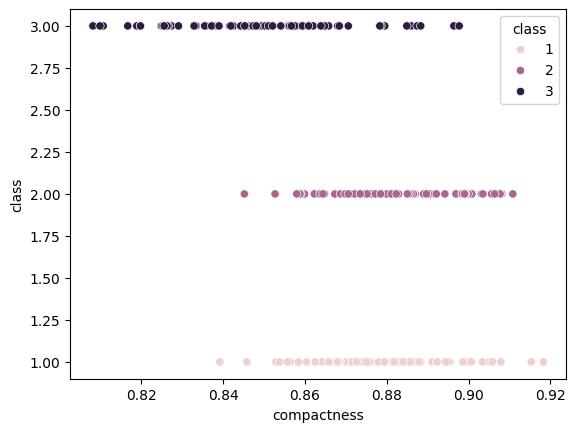

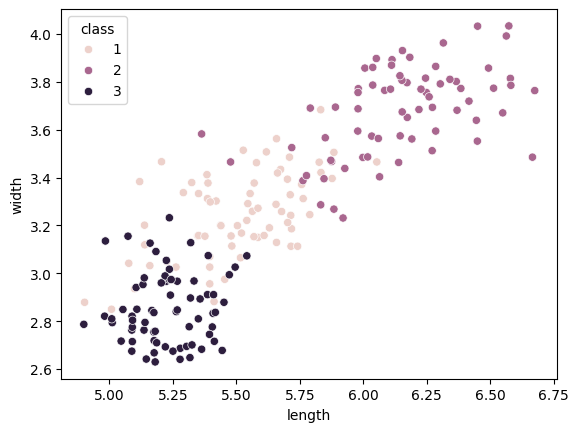

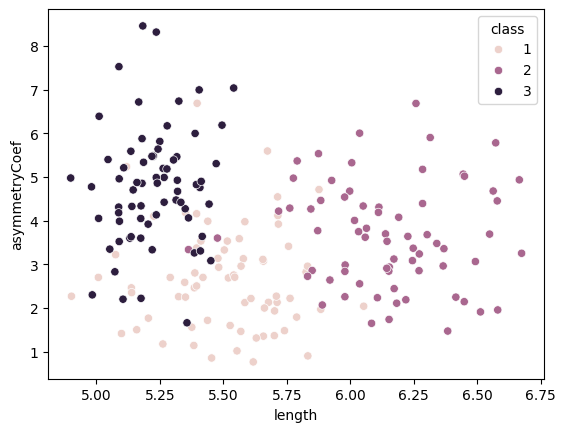

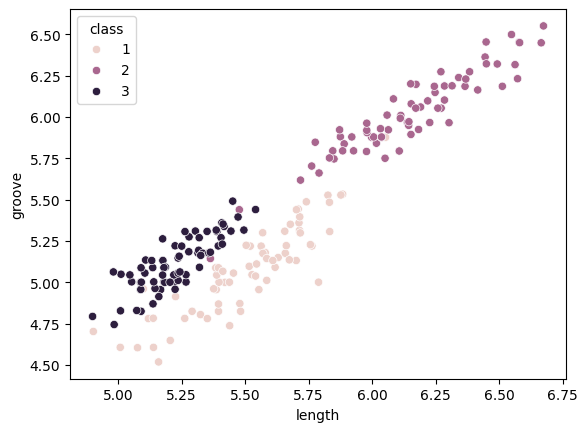

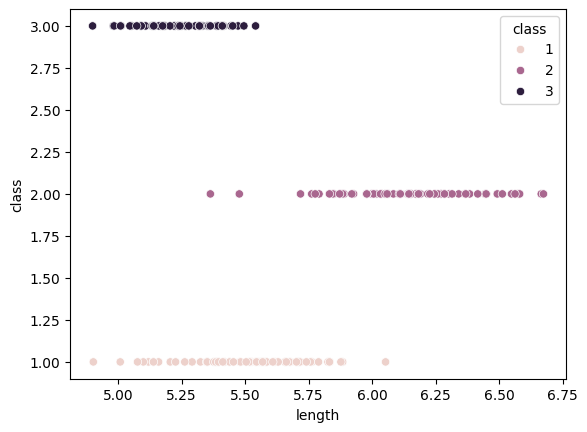

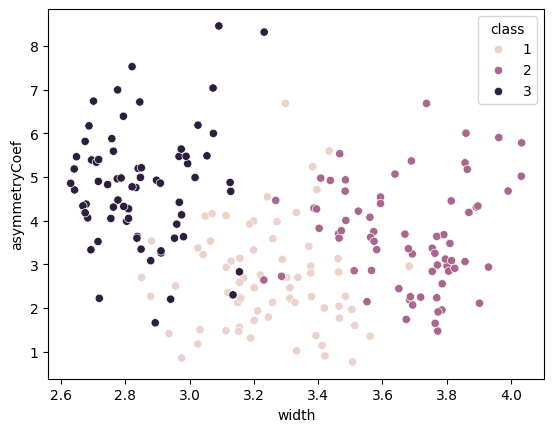

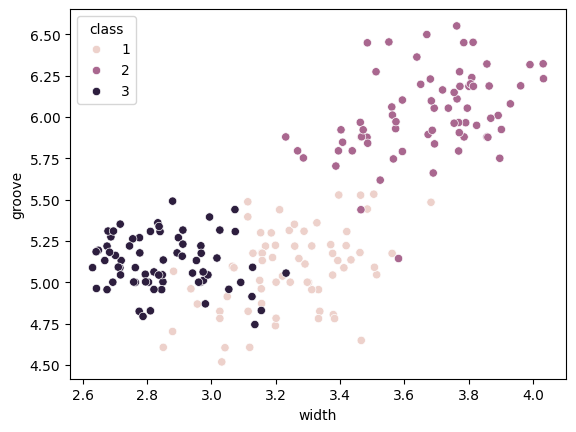

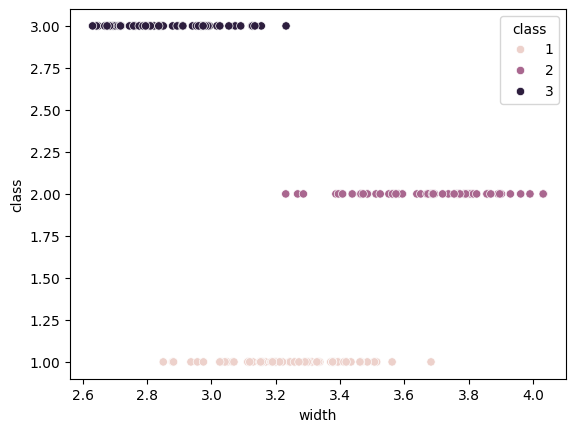

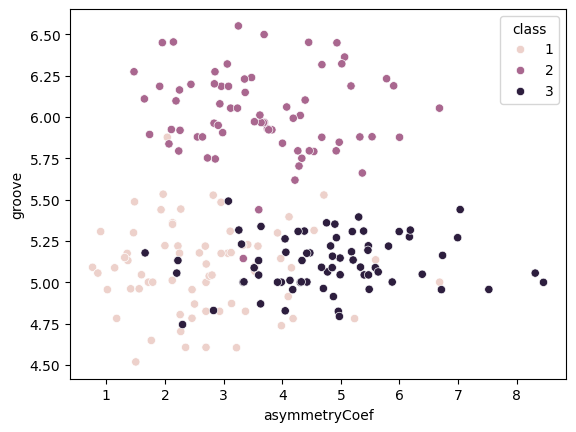

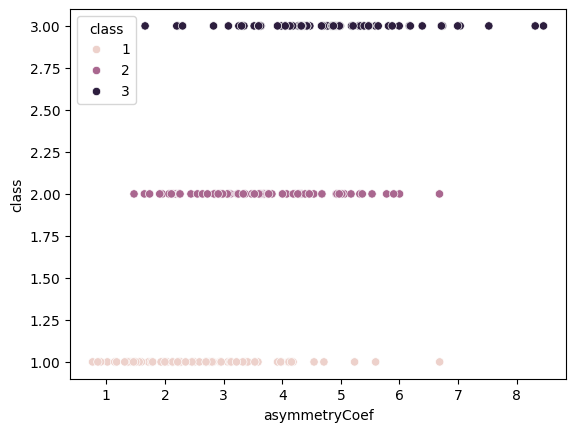

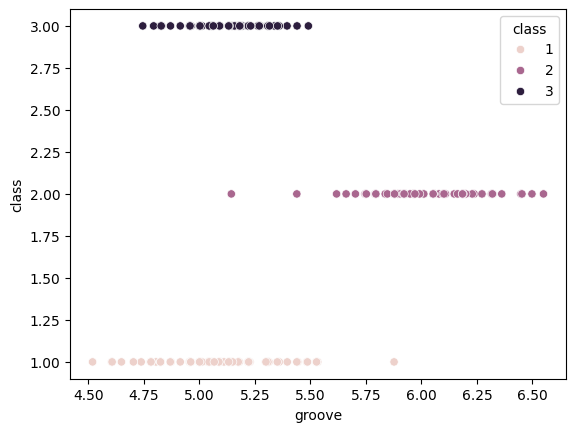

In [3]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)):
    x_label = df[cols[i]]
    y_label = df[cols[j]]
    print()
    sns.scatterplot(x = x_label, y = y_label , data = df, hue = "class")
    plt.show()

# **Clustering**

In [4]:
from sklearn.cluster import KMeans

x = "parameter"
y = "asymmetryCoef"
X = df[[x,y]].values

kmeans = KMeans(n_clusters=3).fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns= [x, y, "cluster"])

**K Means Classes**

[]

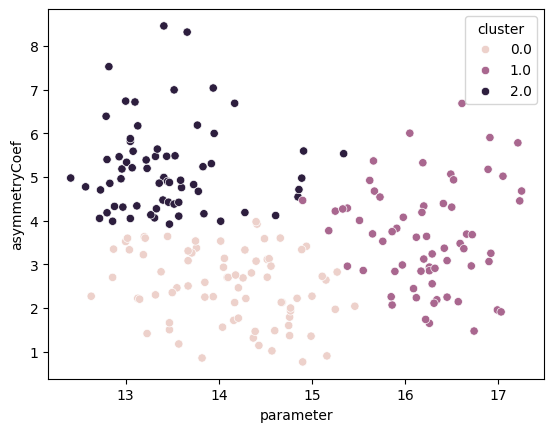

In [6]:
sns.scatterplot(x = x, y = y, hue = "cluster", data = clusters_df)
plt.plot()

**Original Classes**

[]

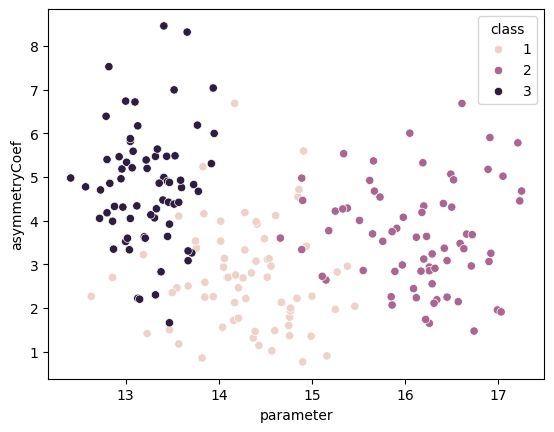

In [7]:
sns.scatterplot(x = x, y = y, hue = "class", data = df)
plt.plot()

**Higher Dimension**

In [10]:
X = df[cols[:-1]].values
kmeans1 = KMeans(n_clusters=3).fit(X)
clusters1 = kmeans1.labels_
clusters_df = pd.DataFrame(np.hstack((X, clusters1.reshape(-1,1))), columns = df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**KMeans Classes with Higher Dimension**

[]

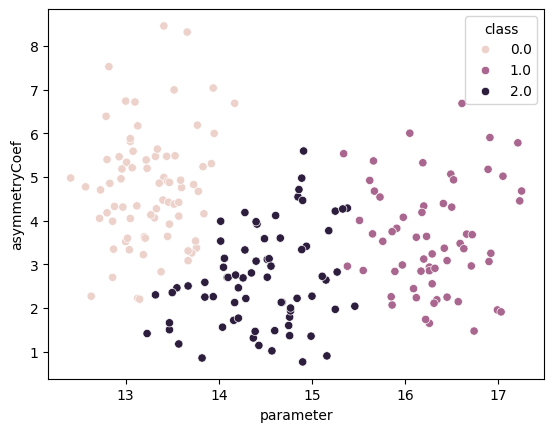

In [11]:
sns.scatterplot(x = x, y = y, hue = "class", data = clusters_df)
plt.plot()

**Orginal Classes**

[]

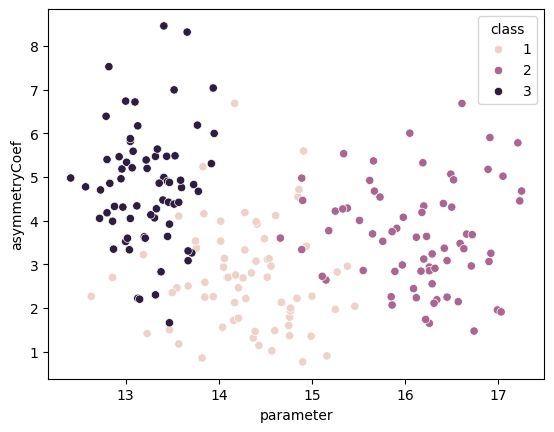

In [12]:
sns.scatterplot(x = x, y = y, hue = "class", data = df)
plt.plot()

# **Principal Component Analysis (PCA)**

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [14]:
X.shape

(210, 7)

In [15]:
X_pca.shape

(210, 2)

In [16]:
X_pca[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

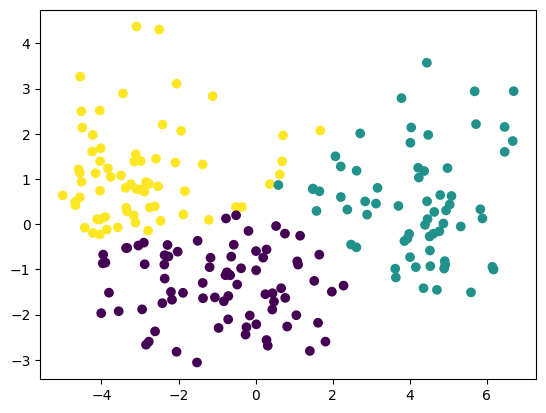

In [17]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.show()

# **K Means Clustaring with PCA**

In [18]:
kmeans_pca_df = pd.DataFrame(np.hstack((X_pca, clusters.reshape(-1,1))), columns = ["PCA-1", "PCA-2", "Class"])

In [22]:
truth_pca_df = pd.DataFrame(np.hstack((X_pca, df["class"].values.reshape(-1,1))), columns = ["PCA-1", "PCA-2", "Class"])

**K Means Classes with PCA**

[]

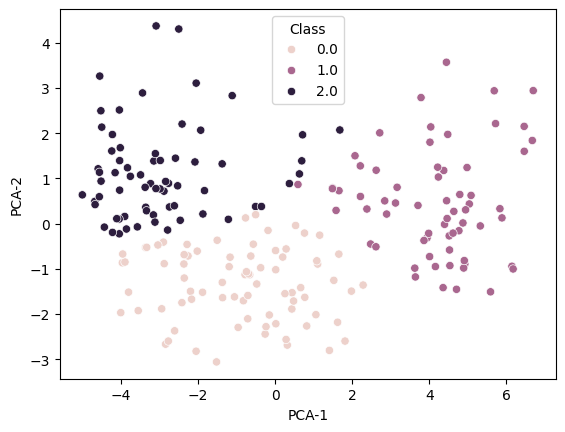

In [26]:
sns.scatterplot(x = "PCA-1", y = "PCA-2", hue = "Class", data = kmeans_pca_df)
plt.plot()

**True Classes**

[]

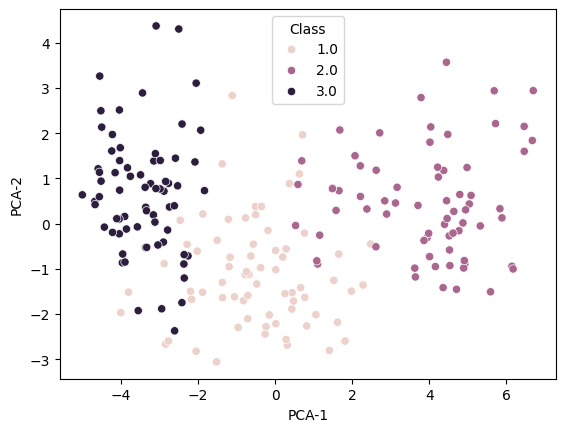

In [27]:
sns.scatterplot(x = "PCA-1", y = "PCA-2", hue = "Class", data = truth_pca_df)
plt.plot()